Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.2936 - val_loss: 0.2569
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2550 - val_loss: 0.2518
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2459 - val_loss: 0.2426
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.2401 - val_loss: 0.2351
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2281 - val_loss: 0.2230
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2215 - val_loss: 0.2172
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2149 - val_loss: 0.2130
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.2106 - val_loss: 0.2075
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2003 - val_loss: 0.1940
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1921 - val_loss: 0.1898
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.1887 - val_loss: 0.1871
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━

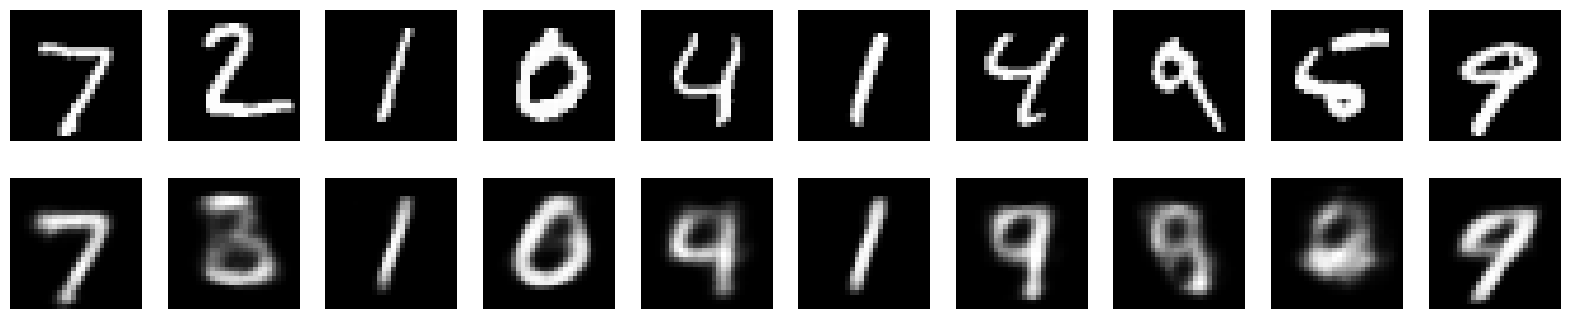

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu",
                activity_regularizer=regularizers.l1(1e-5))(input_img)  # sparsity
encoded = Dense(64, activation="relu")(encoded)
latent = Dense(32, activation="sigmoid")(encoded)  # compressed representation

# Decoder
decoded = Dense(64, activation="relu")(latent)
decoded = Dense(128, activation="relu")(decoded)
output_img = Dense(784, activation="sigmoid")(decoded)

# Autoencoder model
autoencoder = Model(input_img, output_img)

# Compile
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Reconstruct some digits
decoded_imgs = autoencoder.predict(x_test[:10])

# Plot original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()
